In [20]:
import matplotlib.pyplot as plt
import os
import cv2
import glob
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

In [32]:
def get_dim_dist(image_paths: list) -> dict:
    dim_dist = {"H": [], "W": []}
    for image_path in image_paths:
        image = cv2.imread(image_path)
        H, W, _ = image.shape
        dim_dist["H"].append(H)
        dim_dist["W"].append(W)

    return dim_dist

def merge_dicts(dim_dist_glb, dim_dist_data):
    for key in dim_dist_glb.keys():
        dim_dist_glb[key].extend(dim_dist_data[key])

    return dim_dist_glb

def create_barplot(dim_dist):
    H_values = dim_dist["H"]
    W_values = dim_dist["W"]

    fig, ax = plt.subplots()
    ax.bar(["Height", "Width"], [sum(H_values)/len(H_values), sum(W_values)/len(W_values)])
    plt.show()

def create_histogram(dim_dist):
    H_values = dim_dist["H"]
    W_values = dim_dist["W"]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(H_values, bins=20, color='blue', alpha=0.7)
    plt.title('Height Distribution')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(W_values, bins=20, color='green', alpha=0.7)
    plt.title('Width Distribution')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
   

def create_bubble_plot(dim_dist):
    data = {"Height": dim_dist["H"], "Width": dim_dist["W"]}
    df = pd.DataFrame(data)

    df['Frequency'] = df.groupby(['Height', 'Width']).transform('size')
    df['Alpha'] = np.clip(df['Frequency'] / df['Frequency'].max(), 0.1, 1)

    # Create bubble plot
    sns.scatterplot(data=df, x='Width', y='Height', size='Frequency', hue='Frequency', sizes=(20, 200), alpha=0.7)
    plt.title('Bubble Plot of Height vs Width')
    plt.xlabel('Width')
    plt.ylabel('Height')

    # Show plot
    plt.show()


In [15]:
data_path = "/media/KutumLabGPU/split_data_png_new/train"

dim_dist_glb = {"H": [], "W": []}
for type_ in os.listdir(data_path):
    print(type_)
    image_dir = os.path.join(data_path, type_)
    print(image_dir)
    if type_ == "OSCC":
        for subtype_ in os.listdir(os.path.join(data_path, "OSCC")):
            for pid in os.listdir(os.path.join(image_dir, subtype_)):
                image_paths = glob.glob(os.path.join(image_dir, subtype_, pid) + "/*.png")
                
                # Update the Dict
                dim_dist_glb = merge_dicts(dim_dist_glb, get_dim_dist(image_paths))
    else:
        for pid in os.listdir(os.path.join(data_path, type_)):
            image_dir = os.path.join(image_dir, pid)
            image_paths = glob.glob(image_dir + "/*.png")

            # Update the Dict
            dim_dist_glb = merge_dicts(dim_dist_glb, get_dim_dist(image_paths))

OSCC
/media/KutumLabGPU/split_data_png_new/train/OSCC


NORMAL
/media/KutumLabGPU/split_data_png_new/train/NORMAL
OSMF
/media/KutumLabGPU/split_data_png_new/train/OSMF


In [16]:
H_values = dim_dist_glb["H"]
W_values = dim_dist_glb["W"]

print("H: ", max(H_values), min(H_values))
print("W: ", max(W_values), min(W_values))
print("H Unique: ", np.unique(H_values))
print("W Unique: ", np.unique(W_values))

H:  2048 960
W:  2880 1280
H Unique:  [ 960 1536 1944 2048]
W Unique:  [1280 2048 2592 2880]


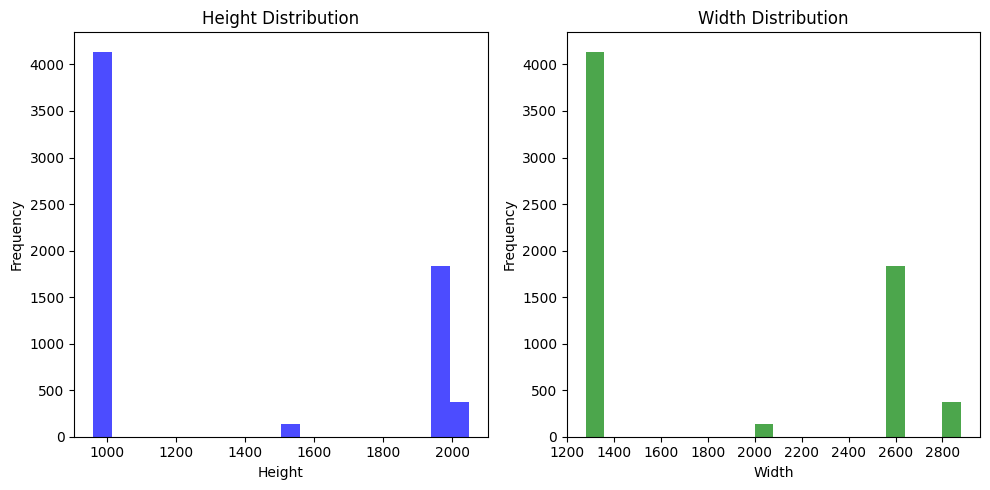

In [17]:
create_histogram(dim_dist_glb)

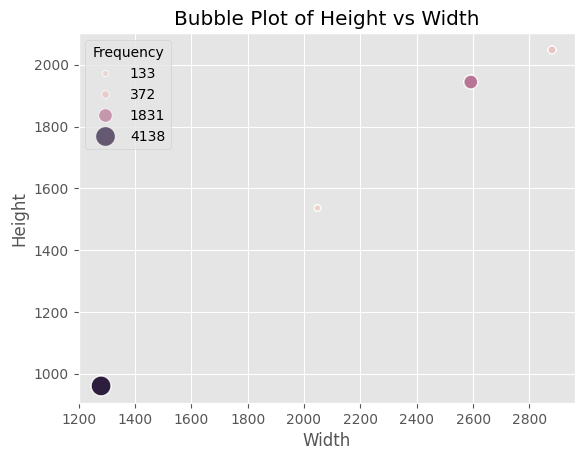

In [33]:
create_bubble_plot(dim_dist_glb)